# Exploración de los datos:

Los datos fueron obtenidos de la siguiente pagina web: [CIVIRE](http://oab.ambientebogota.gov.co/es/indicadores?s=l&id=525&v=l#) 

Estos fueron copiados en un archivo de texto plano llamado Origen, para luego ajustarlos con el siguiente código:

In [1]:
Original=open('Original','r')
Titulos=Original.readline().replace('	',',').split(',')[:-1]

print 'Se ha separado por comas las columnas y reemplazado los datos nulos por cero. \n \
	El archivo de datos esta en el siguiente orden:'
for i in range(len(Titulos)):
	print 'Columna: '+str(i)+' '+Titulos[i]

Datos=open('Datos','w')
Datos.write(Original.read().replace(' - ','	').replace(' ','0').replace(',','.').replace('	',',').replace('08','8').replace('09','9'))

Original.close()
Datos.close()

Se ha separado por comas las columnas y reemplazado los datos nulos por cero. 
 	El archivo de datos esta en el siguiente orden:
Columna: 0 Año
Columna: 1 Semana
Columna: 2 Virus Sincitial Respiratorio - VSR
Columna: 3 Adenovirus - ADNV
Columna: 4 Influenza A - IA
Columna: 5 Influenza B - IB
Columna: 6 Parainfluenza I - PI1
Columna: 7 Parainfluenza II - PI2
Columna: 8 Parainfluenza III - PI3
Columna: 9 Circulacion Virus Respiratorios CIVIRE (% por especie viral/Semana)


Ahora se tiene otro archivo de texto plano "Datos" donde se tienen los datos numericos ordenados en columnas. Lo siguiente es convertir ese arhivo de texto en una matriz para poder operar facilmente: 

In [2]:
%matplotlib nbagg 
import matplotlib.pyplot as plt
import numpy as np

Datos=open('Datos','r')

#Construye una matriz a partir de un string de la forma '1,2,3;4,5,6'. Se ignoran los dos últimos caracteres (; \n) 
A=Datos.read().replace('\n',';')[:-2]
A=np.array(np.mat(A))
    
#Semana 0->2012-1 , 117->2014-14
Semana=np.arange(len(A[:,0]))

#Se forma una lista que contiene Año-Semana
Fecha=[]
QuintaFecha=[]
for i in Semana:
    Fecha.append(str(int(A[i,0]))+'-'+str(int(A[i,1])))
    if i%5==0:
        QuintaFecha.append(Fecha[i])

<IPython.core.display.Javascript object>


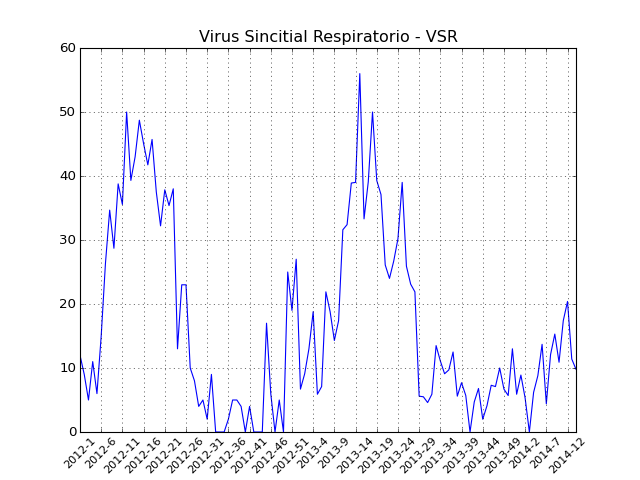

<IPython.core.display.Javascript object>


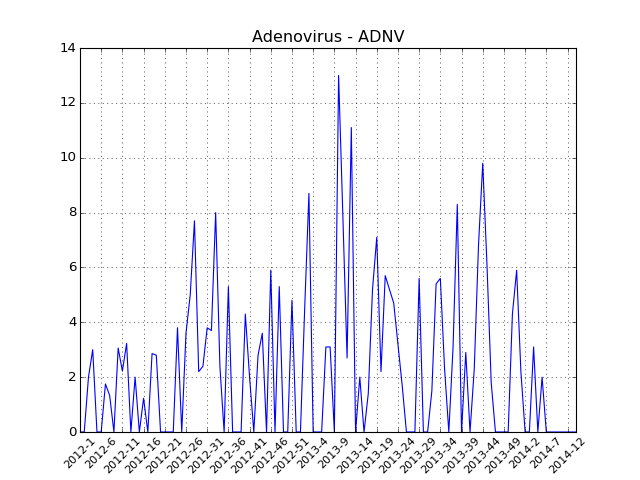

<IPython.core.display.Javascript object>


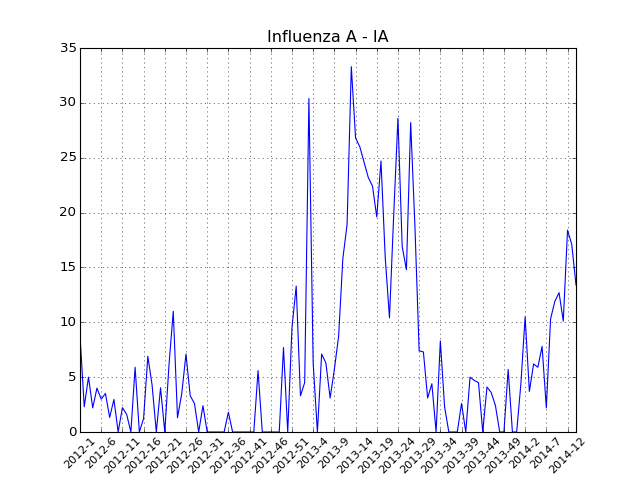

<IPython.core.display.Javascript object>


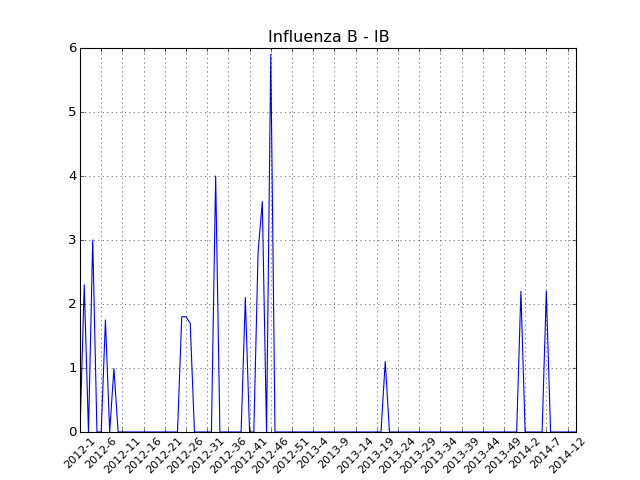

<IPython.core.display.Javascript object>


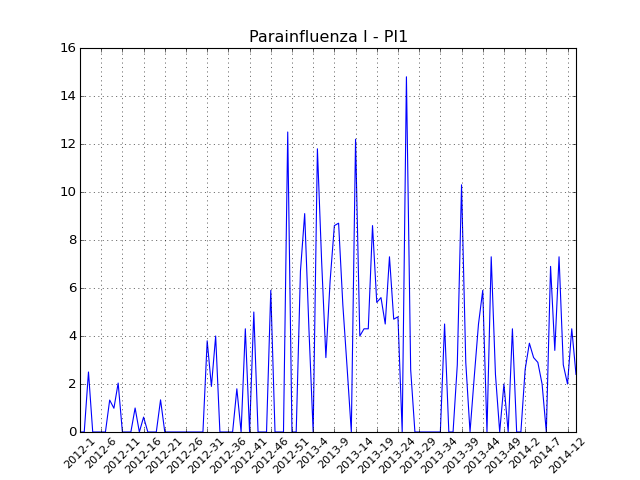

<IPython.core.display.Javascript object>


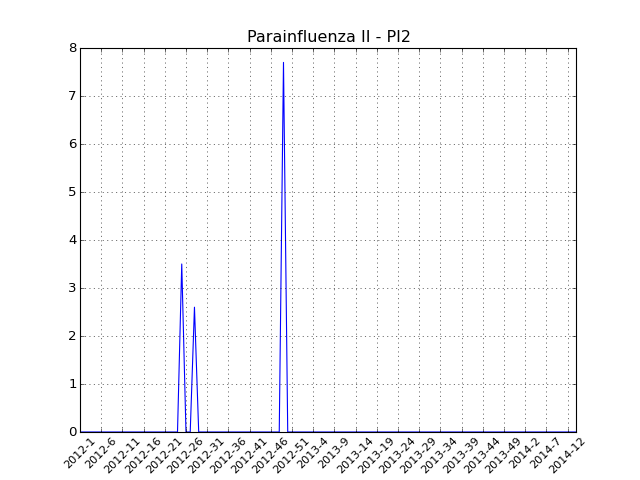

<IPython.core.display.Javascript object>


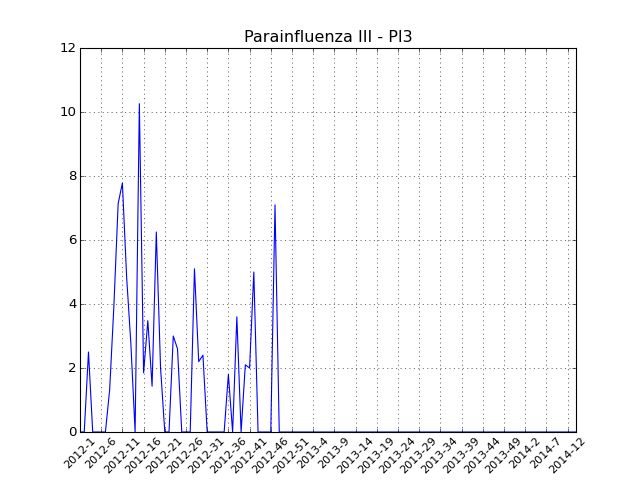

<IPython.core.display.Javascript object>


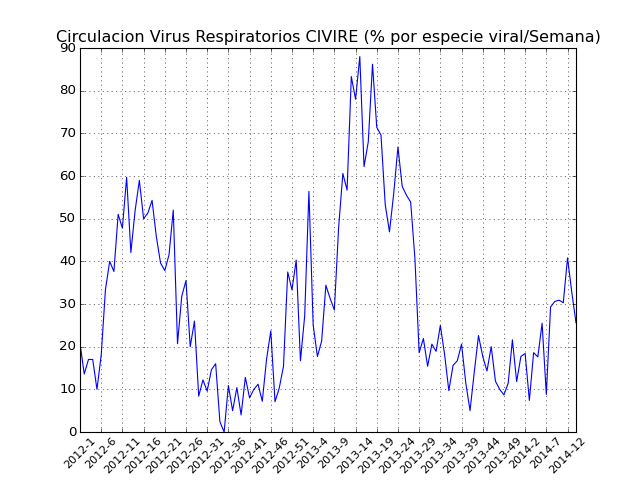

In [3]:
for i in range(2,10):
    plt.figure()
    plt.title(Titulos[i])
    plt.grid()
    plt.xticks(range(0,len(Fecha),5),QuintaFecha,size='small',rotation=45)
    plt.plot(Semana,A[:,i])